In [109]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=True)

## Solución utilizando NR de la cinemática inversa del manipulador RR

$$ P_x = L_1 \cos\theta_1 + L_2 \cos(\theta_1 + \theta_2) $$
$$ P_y = L_1 \sin\theta_1 + L_2 \sin(\theta_1 + \theta_2) $$

In [110]:
L1, L2 = 100, 100
Px, Py = 120, 80
t1, t2 = symbols("\\theta_1, \\theta_2")

ec1 = L1*cos(t1) + L2*cos(t1 + t2) - Px
ec2 = L1*sin(t1) + L2*sin(t1 + t2) - Py

b = Matrix([ec1, ec2])
J = b.jacobian([t1,t2])

# Valores iniciales
X0 = {t1:0.1, t2:rad(70)}

In [111]:
def nr(J,b,x0,eps=0.001):
    while True:
        x = ( J.subs(x0).evalf().inv() )*(-b.subs(x0).evalf() )
        if x.norm() < eps: break
        for k,var in enumerate(x0):
            x0[var] += x[k] 
    return x0

In [112]:
x1 = nr(J,b,{t1:},0.1) 

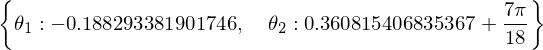

In [113]:
x1

In [114]:
x2 = nr(J,b,X0,0.0001)

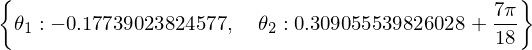

In [115]:
x2